In [1]:
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [10]:
data = pd.read_csv('./Data/fundamentals.csv')
data.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [59]:
data.shape

(1781, 79)

In [7]:
data.columns

Index(['Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
  

In [56]:
data.isnull().sum().sort_values(ascending = False)

Quick Ratio                     299
Cash Ratio                      299
Current Ratio                   299
Estimated Shares Outstanding    219
Earnings Per Share              219
                               ... 
Intangible Assets                 0
Income Tax                        0
Gross Profit                      0
Gross Margin                      0
Net Cash Flows-Financing          0
Length: 79, dtype: int64

In [54]:
data_cleaner = data.copy()
# Dropping columns based off of knowledge and/or null values
data_cleaner.drop(labels=['Unnamed: 0', 'For Year', 'Net Income Adjustments', 'Net Income Applicable to Common Shareholders','Net Income-Cont. Operations',
                         'Earnings Before Interest and Tax', 'Earnings Before Tax', 'Misc. Stocks', 'Net Cash Flow', 'Retained Earnings', 'Sale and Purchase of Stock',
                        'Total Liabilities & Equity', 'Treasury Stock', 'Earnings Per Share', 'Estimated Shares Outstanding', 'Cash Ratio', 'Current Ratio', 'Quick Ratio', 'Total Current Liabilities'], axis=1, inplace = True)

In [57]:
data_cleaner.isnull().sum().sort_values(ascending = False).head()

Ticker Symbol               0
Period Ending               0
Net Cash Flows-Financing    0
Net Cash Flows-Investing    0
Net Income                  0
dtype: int64

In [58]:
data_cleaner.shape

(1781, 60)

In [61]:
data_cleaner['Period Ending'].dtype

dtype('O')

In [76]:
data_cleaner['Year'] = pd.to_datetime(data_cleaner['Period Ending']).dt.year

In [77]:
data_cleaner.head()

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash and Cash Equivalents,Changes in Inventories,...,Research and Development,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Equity,Total Liabilities,Total Revenue,Year
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,1.330000e+09,0.0,...,0.0,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,-7.987000e+09,2.489100e+10,2.485500e+10,2012
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,2.175000e+09,0.0,...,0.0,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,-2.731000e+09,4.500900e+10,2.674300e+10,2013
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,1.768000e+09,0.0,...,0.0,2.068600e+10,1.677000e+09,6.309000e+09,4.322500e+10,1.175000e+10,2.021000e+09,4.120400e+10,4.265000e+10,2014
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,1.085000e+09,0.0,...,0.0,2.127500e+10,2.231000e+09,5.864000e+09,4.841500e+10,9.985000e+09,5.635000e+09,4.278000e+10,4.099000e+10,2015
4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,5.981110e+08,-260298000.0,...,0.0,2.440721e+09,6.270000e+05,0.000000e+00,4.613814e+09,3.184200e+09,1.210694e+09,3.403120e+09,6.205003e+09,2012


In [87]:
for column_name in data_cleaner.columns:
    column = data_cleaner[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Ticker Symbol  is :  0
Count of zeros in column  Period Ending  is :  0
Count of zeros in column  Accounts Payable  is :  46
Count of zeros in column  Accounts Receivable  is :  193
Count of zeros in column  Add'l income/expense items  is :  305
Count of zeros in column  After Tax ROE  is :  7
Count of zeros in column  Capital Expenditures  is :  67
Count of zeros in column  Capital Surplus  is :  257
Count of zeros in column  Cash and Cash Equivalents  is :  0
Count of zeros in column  Changes in Inventories  is :  640
Count of zeros in column  Common Stocks  is :  101
Count of zeros in column  Cost of Revenue  is :  107
Count of zeros in column  Deferred Asset Charges  is :  1032
Count of zeros in column  Deferred Liability Charges  is :  577
Count of zeros in column  Depreciation  is :  13
Count of zeros in column  Effect of Exchange Rate  is :  589
Count of zeros in column  Equity Earnings/Loss Unconsolidated Subsidiary  is :  1239
Count of zeros in column

Sometimes a lot of 0s is okay if it makes sense in the context of the variable

In [89]:
data_cleaner['Year'].value_counts()

2015    445
2013    439
2014    436
2012    236
2016    220
2003      1
2004      1
2006      1
2007      1
2017      1
Name: Year, dtype: int64

In [115]:
data_cleaner.drop(data_cleaner[data_cleaner['Ticker Symbol'] == 'COTY'].index, inplace = True)

In [111]:
data_cleaner[data_cleaner['Ticker Symbol'] == 'ILMN']

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash and Cash Equivalents,Changes in Inventories,...,Research and Development,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Equity,Total Liabilities,Total Revenue,Year
835,ILMN,2013-12-29,292775000.0,-15928000.0,64897000.0,8.0,-79215000.0,2.562705e+09,711637000.0,6217000.0,...,276743000.0,397285000.0,29288000.0,453966000.0,3.019006e+09,1.617535e+09,1.533202e+09,1.485804e+09,1.421178e+09,2013
836,ILMN,2014-12-28,417902000.0,-50381000.0,-24225000.0,24.0,-105996000.0,2.172940e+09,636154000.0,-36542000.0,...,388055000.0,471921000.0,304256000.0,702217000.0,3.339640e+09,1.889603e+09,1.462798e+09,1.876842e+09,1.861358e+09,2014
837,ILMN,2016-01-03,526070000.0,-95913000.0,12422000.0,25.0,-142847000.0,2.497501e+09,768770000.0,-80545000.0,...,401527000.0,522046000.0,74929000.0,617450000.0,3.687747e+09,2.096823e+09,1.848553e+09,1.839194e+09,2.219762e+09,2015
838,ILMN,2017-01-01,480681000.0,3239000.0,7327000.0,21.0,-259891000.0,2.733394e+09,734516000.0,-29686000.0,...,504415000.0,584491000.0,1250000.0,824208000.0,4.280600e+09,2.318091e+09,2.197229e+09,2.083371e+09,2.398373e+09,2017


In [112]:
data_cleaner.loc[(data_cleaner['Ticker Symbol'] == 'ILMN') & (data_cleaner['Year'] == 2016), 'Year'] = 2015
data_cleaner.loc[(data_cleaner['Ticker Symbol'] == 'ILMN') & (data_cleaner['Year'] == 2017), 'Year'] = 2016

In [113]:
data_cleaner[data_cleaner['Ticker Symbol'] == 'ILMN']

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash and Cash Equivalents,Changes in Inventories,...,Research and Development,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Equity,Total Liabilities,Total Revenue,Year
835,ILMN,2013-12-29,292775000.0,-15928000.0,64897000.0,8.0,-79215000.0,2.562705e+09,711637000.0,6217000.0,...,276743000.0,397285000.0,29288000.0,453966000.0,3.019006e+09,1.617535e+09,1.533202e+09,1.485804e+09,1.421178e+09,2013
836,ILMN,2014-12-28,417902000.0,-50381000.0,-24225000.0,24.0,-105996000.0,2.172940e+09,636154000.0,-36542000.0,...,388055000.0,471921000.0,304256000.0,702217000.0,3.339640e+09,1.889603e+09,1.462798e+09,1.876842e+09,1.861358e+09,2014
837,ILMN,2016-01-03,526070000.0,-95913000.0,12422000.0,25.0,-142847000.0,2.497501e+09,768770000.0,-80545000.0,...,401527000.0,522046000.0,74929000.0,617450000.0,3.687747e+09,2.096823e+09,1.848553e+09,1.839194e+09,2.219762e+09,2015
838,ILMN,2017-01-01,480681000.0,3239000.0,7327000.0,21.0,-259891000.0,2.733394e+09,734516000.0,-29686000.0,...,504415000.0,584491000.0,1250000.0,824208000.0,4.280600e+09,2.318091e+09,2.197229e+09,2.083371e+09,2.398373e+09,2016


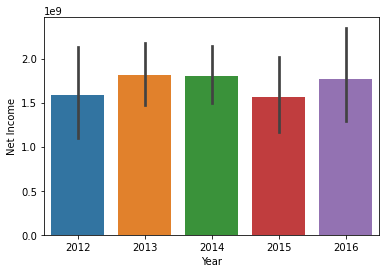

In [117]:
sns.barplot(x = 'Year', y = 'Net Income', data = data_cleaner);

Year doesn't have much of a significant effect on net income

In [122]:
data_cleaner.corrwith(data_cleaner['Net Income']).abs().sort_values(ascending = False)

Net Income                                             1.000000
Operating Income                                       0.919736
Income Tax                                             0.877173
Net Cash Flow-Operating                                0.802668
Gross Profit                                           0.764302
Total Equity                                           0.707092
Total Revenue                                          0.666098
Sales, General and Admin.                              0.614707
Total Current Assets                                   0.590167
Accounts Payable                                       0.578273
Depreciation                                           0.524192
Capital Expenditures                                   0.519341
Net Receivables                                        0.510135
Cost of Revenue                                        0.505888
Net Cash Flows-Investing                               0.486477
Total Assets                            

Possible that some variables with low correlation are still related but not linearly